# Evaluation project- Automobile_insurance_fraud_project Project

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


 target variables--->

fraud_reported



In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Understanding the Datasets:

# These are the columns in dataset

months_as_customer      --   Premium completed months
age                     --   Age of customer
policy_number           --   Policy number
policy_bind_date        ---  Policy date
policy_state             --   Policy state
policy_csl               --   ploicy Combined single limit (CSL)
policy_deductable        --
policy_annual_premium             
umbrella_limit          --  An umbrella policy is a policy that provides excess limits and gives additional excess coverage                                    over the normal limits and coverage of liability policies           
insured_zip                       
insured_sex                       
insured_education_level           
insured_occupation                
insured_hobbies                   
insured_relationship              
capital-gains                    
capital-loss                      
incident_date                     
incident_type                     
collision_type                    
incident_severity                 
authorities_contacted             
incident_state                    
incident_city                     
incident_location                 
incident_hour_of_the_day          
number_of_vehicles_involved       
property_damage                   
bodily_injuries                   
witnesses                         
police_report_available           
total_claim_amount                
injury_claim                      
property_claim                    
vehicle_claim                     
auto_make                         
auto_model                        
auto_year                         
fraud_reported            

We drop this column '_c39' as it has all nan values and the date column 'policy_bind_date' and policy_number

In [6]:
df.drop(['_c39'],axis=1,inplace=True)

In [7]:
df.drop(['policy_bind_date'],axis=1,inplace=True)

In [8]:
df.drop(['policy_number'],axis=1,inplace=True)

# Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes

months_as_customer               int64
age                              int64


policy_state                    object
policy_csl                      object
policy_deductable                int64

umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_make                       object
auto_model                      object
auto_year                        int64
fraud_reported                  object

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64


<AxesSubplot:xlabel='months_as_customer', ylabel='count'>

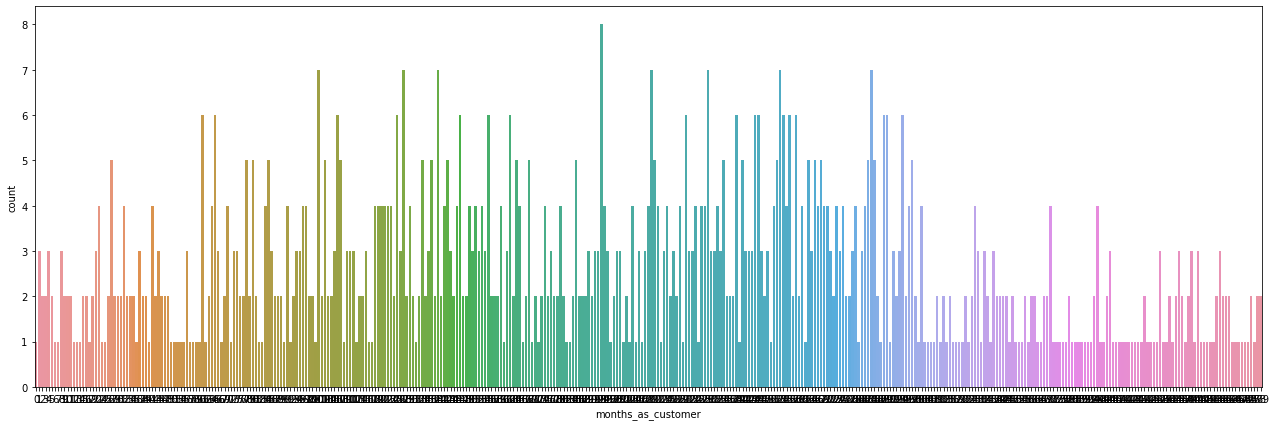

In [10]:
ax=df['months_as_customer'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['months_as_customer'])


months_as_customer is started from 1 to 8

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64


<AxesSubplot:xlabel='age', ylabel='count'>

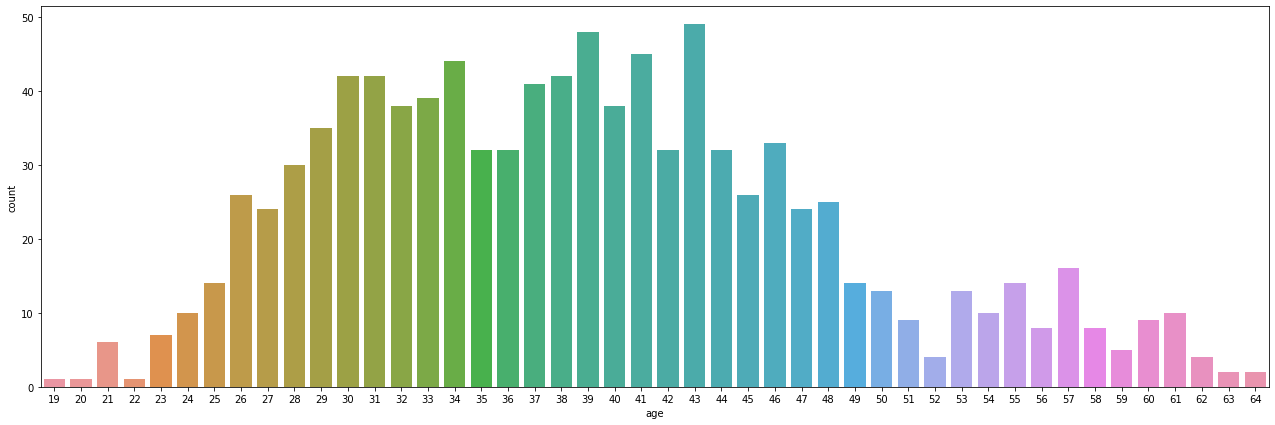

In [11]:
ax=df['age'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['age'])


age of the customer is from 19 to 64

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<AxesSubplot:xlabel='policy_state', ylabel='count'>

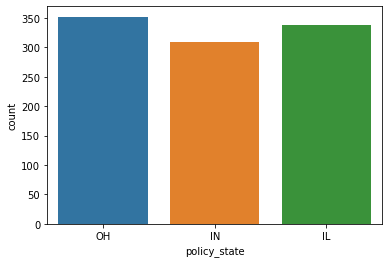

In [12]:
ax=df['policy_state'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['policy_state'])


policy_state are  
OH    352
IL    338
IN    310

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

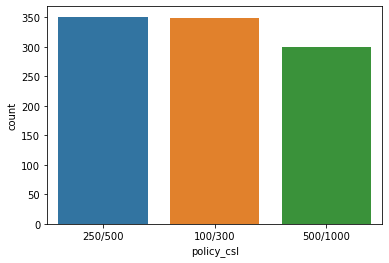

In [13]:
ax=df['policy_csl'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['policy_csl'])


ploicy Combined single limit (CSL) are 

250/500     351
100/300     349
500/1000    300

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

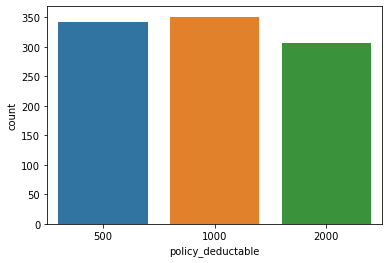

In [14]:
ax=df['policy_deductable'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['policy_deductable'])


policy_deductable are of three types

1000    351
500     342
2000    307

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

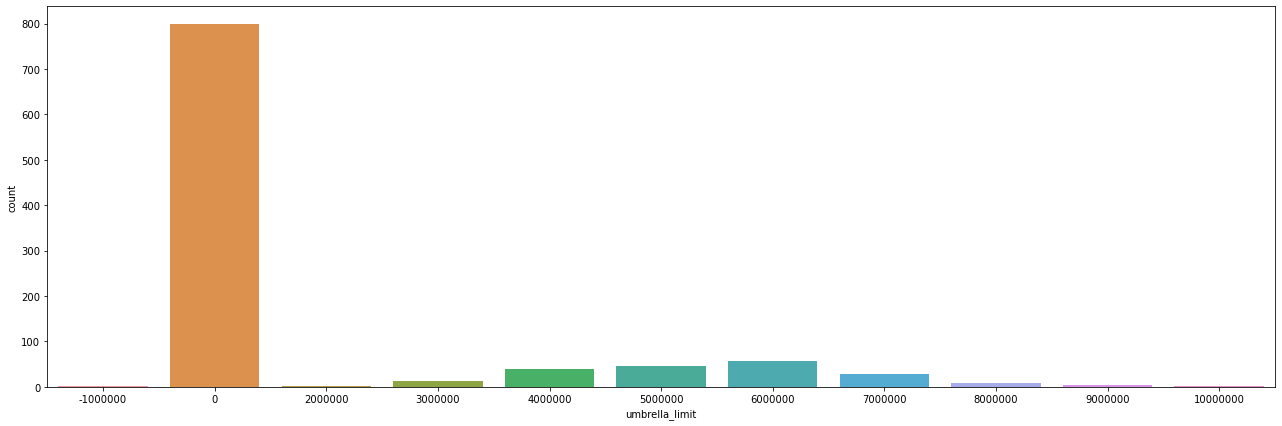

In [15]:
ax=df['umbrella_limit'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['umbrella_limit'])


excess limits and gives additional excess coverage over the normal limits more for 0
hence we drop this column

In [37]:
df.drop(['umbrella_limit'],axis=1,inplace=True)

446895    2
456602    2
477695    2
469429    2
431202    2
         ..
468313    1
474360    1
476502    1
460895    1
454656    1
Name: insured_zip, Length: 995, dtype: int64


<AxesSubplot:xlabel='insured_zip', ylabel='count'>

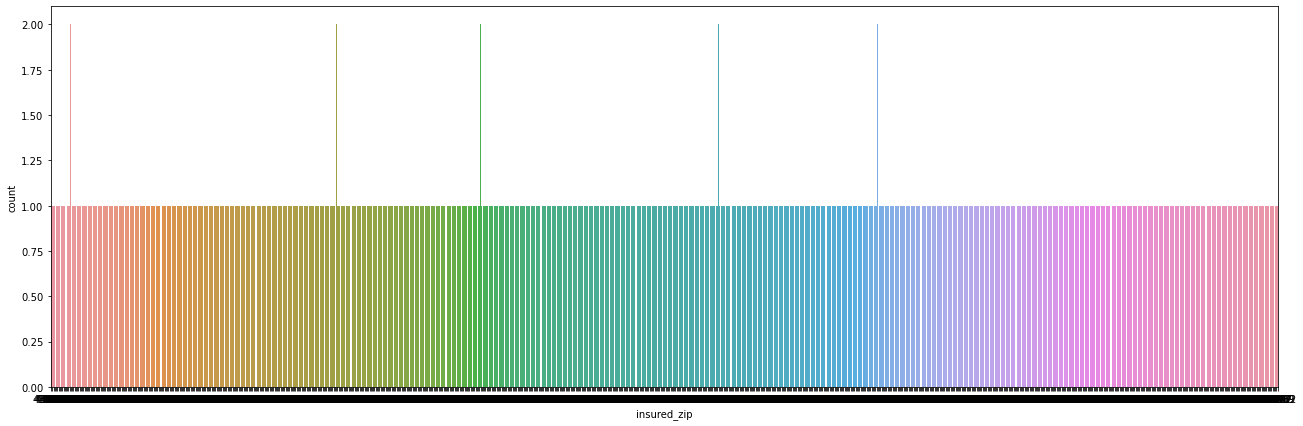

In [16]:
ax=df['insured_zip'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['insured_zip'])


insured_zip is having two values 1 and 2

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

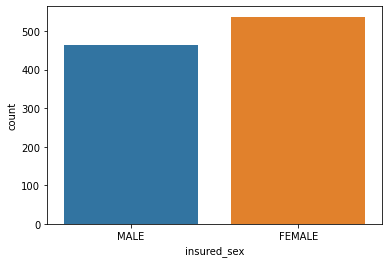

In [17]:
ax=df['insured_sex'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['insured_sex'])


In insured_sex female are more than male

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

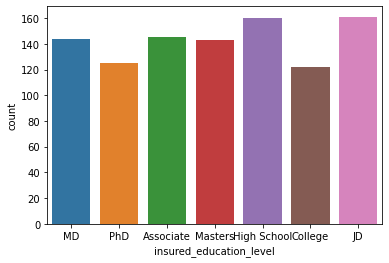

In [18]:
ax=df['insured_education_level'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['insured_education_level'])


insured_education_level are 
JD             
High School    
Associate      
MD             
Masters        
PhD            
College

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

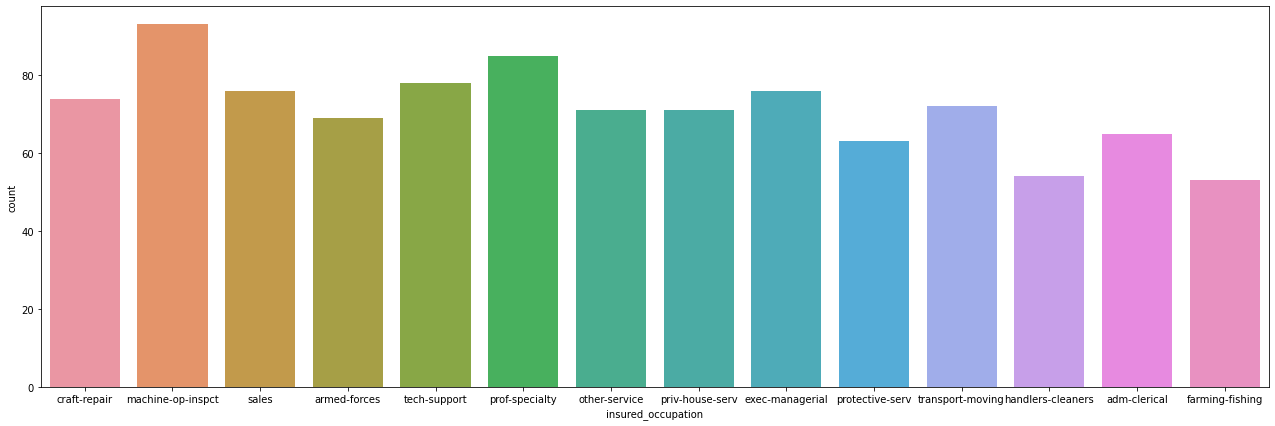

In [19]:
ax=df['insured_occupation'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['insured_occupation'])


insured_occupation are  

machine-op-inspct    
prof-specialty      
tech-support        
sales               
exec-managerial     
craft-repair        
transport-moving    
other-service       
priv-house-serv     
armed-forces        
adm-clerical        
protective-serv     
handlers-cleaners   
farming-fishing 

reading           64
exercise          57
paintball         57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

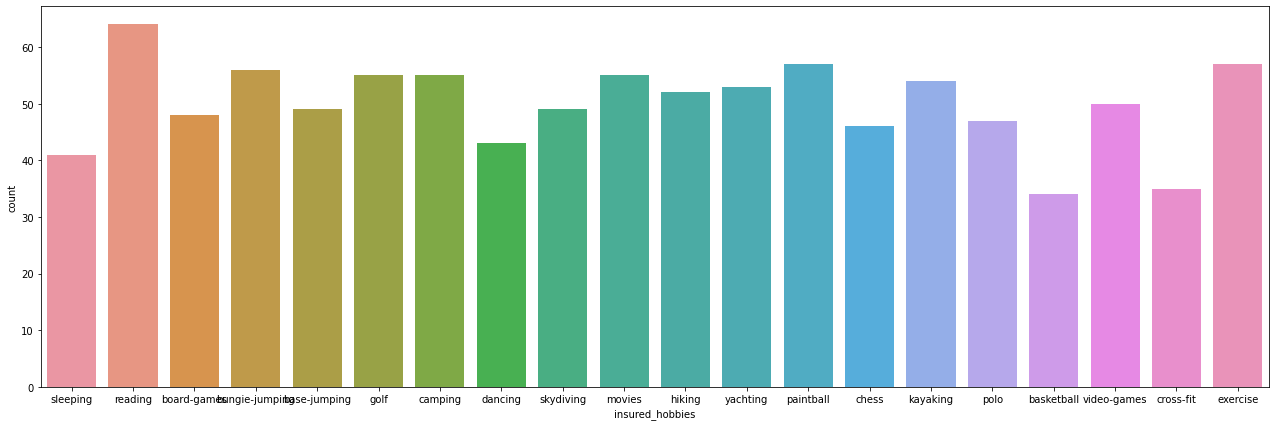

In [21]:
ax=df['insured_hobbies'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['insured_hobbies'])


insured_hobbies are

reading           
exercise          
paintball         
bungie-jumping    
camping           
movies            
golf              
kayaking          
yachting          
hiking            
video-games       
base-jumping      
skydiving         
board-games       
polo              
chess             
dancing           
sleeping          
cross-fit         
basketball 


own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

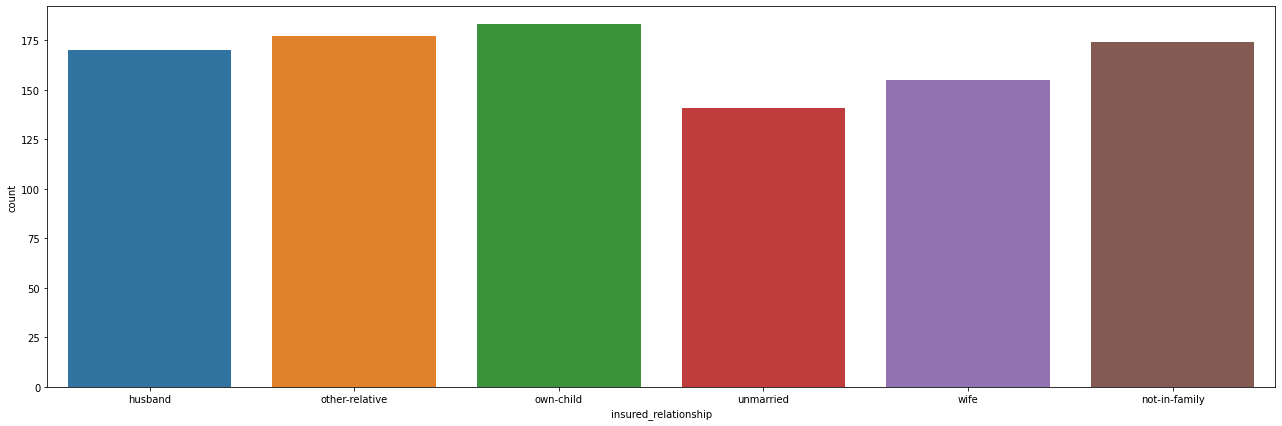

In [22]:
ax=df['insured_relationship'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['insured_relationship'])


insured_relationship are 

own-child         
other-relative    
not-in-family     
husband           
wife              
unmarried 

0         508
46300       5
68500       4
51500       4
48900       3
         ... 
47700       1
94800       1
90700       1
100500      1
54800       1
Name: capital-gains, Length: 338, dtype: int64


<AxesSubplot:xlabel='capital-gains', ylabel='count'>

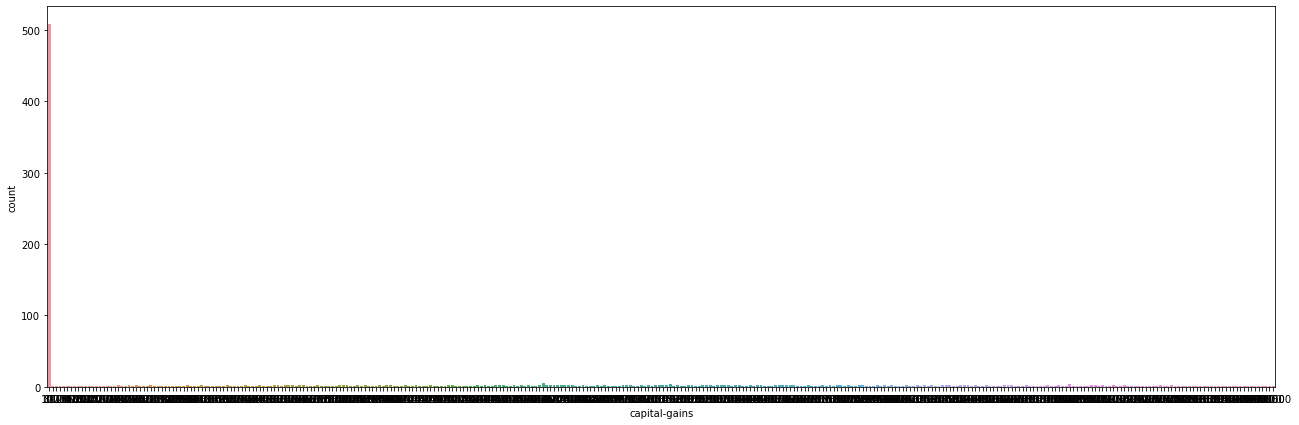

In [23]:
ax=df['capital-gains'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['capital-gains'])


capital-gains is more for 0
we drop this column 

 0        475
-53700      5
-50300      5
-31700      5
-49200      4
         ... 
-32600      1
-46800      1
-50600      1
-40800      1
-43900      1
Name: capital-loss, Length: 354, dtype: int64


<AxesSubplot:xlabel='capital-loss', ylabel='count'>

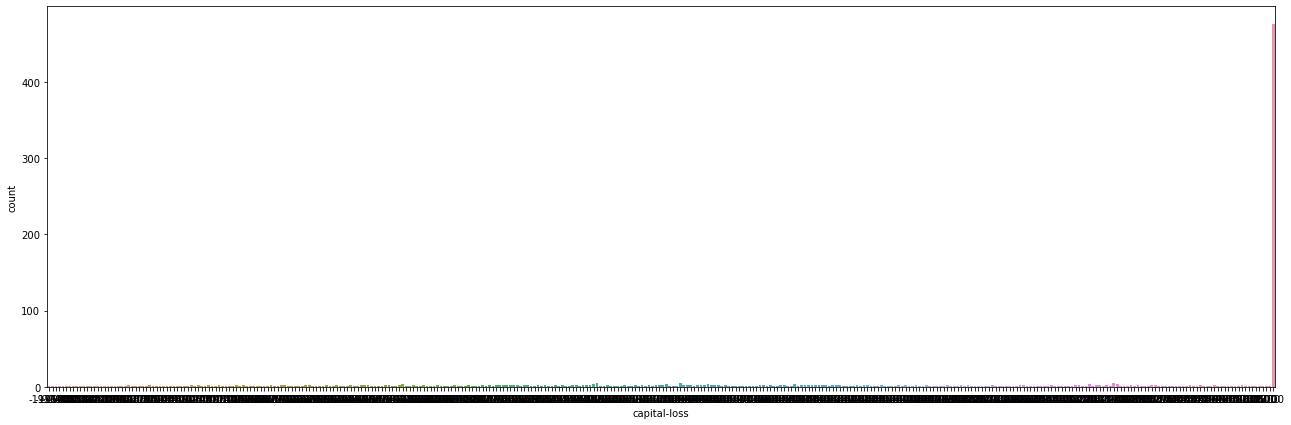

In [24]:
ax=df['capital-loss'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['capital-loss'])


capital-loss is also more for 0

02-02-2015    28
17-02-2015    26
07-01-2015    25
04-02-2015    24
24-01-2015    24
10-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
22-02-2015    20
12-02-2015    20
06-02-2015    20
31-01-2015    20
23-02-2015    19
14-01-2015    19
21-02-2015    19
01-01-2015    19
21-01-2015    19
12-01-2015    19
28-02-2015    18
03-01-2015    18
01-02-2015    18
25-02-2015    18
18-01-2015    18
14-02-2015    18
20-01-2015    18
26-02-2015    17
08-02-2015    17
09-01-2015    17
24-02-2015    17
06-01-2015    17
13-02-2015    16
16-02-2015    16
15-02-2015    16
05-02-2015    16
16-01-2015    16
15-01-2015    15
28-01-2015    15
17-01-2015    15
18-02-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
23-01-2015    13
27-01-2015    13
03-02-2015    13
09-02-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
29-01-2015    11
26-01-2015    11
25-01-2015    10
19-02-2015    10
07-02-2015    10
10-02-2015    10
11-02-2015    10
11-01-2015    

<AxesSubplot:xlabel='incident_date', ylabel='count'>

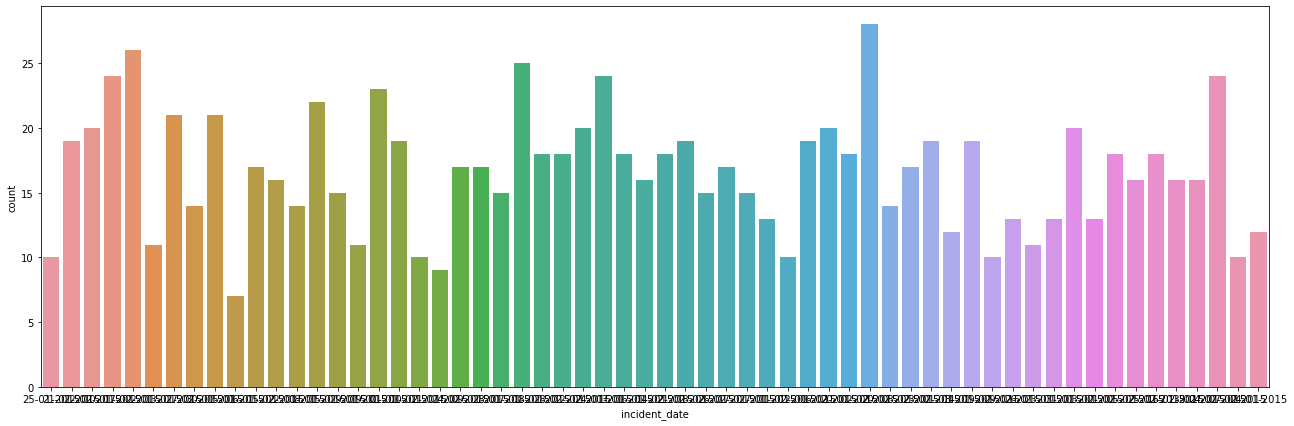

In [25]:
ax=df['incident_date'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['incident_date'])


We drop this column as it is date column


In [26]:
df.drop(["incident_date"],inplace=True,axis=1)

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


<AxesSubplot:xlabel='incident_type', ylabel='count'>

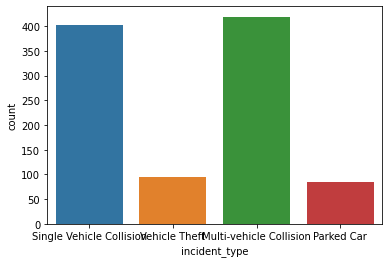

In [27]:
ax=df['incident_type'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['incident_type'])


incident_type are 

Multi-vehicle Collision     
Single Vehicle Collision    
Vehicle Theft               
Parked Car

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

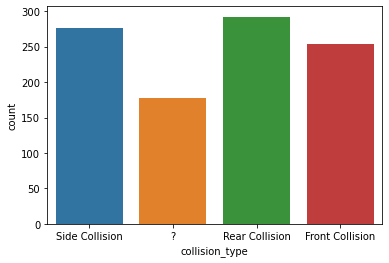

In [28]:
ax=df['collision_type'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['collision_type'])


this column contains ? values so we replace it by nan

In [38]:
df.replace(' ?','np.nan')

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,466132,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,468176,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,430632,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,608117,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,610706,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,431289,FEMALE,Masters,craft-repair,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,608177,FEMALE,PhD,prof-specialty,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,442797,FEMALE,Masters,armed-forces,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,441714,MALE,Associate,handlers-cleaners,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

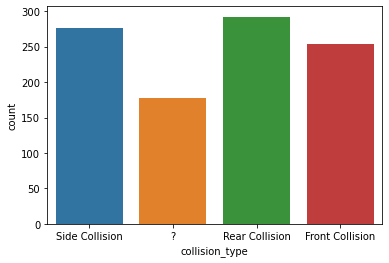

In [39]:
ax=df['collision_type'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['collision_type'])


Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

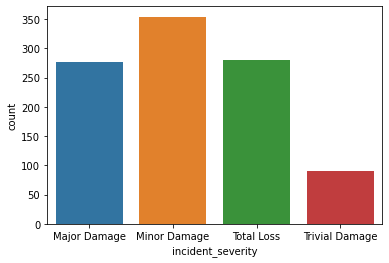

In [31]:
ax=df['incident_severity'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['incident_severity'])


incident_severity are 

Minor Damage      
Total Loss       
Major Damage     
Trivial Damage 

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

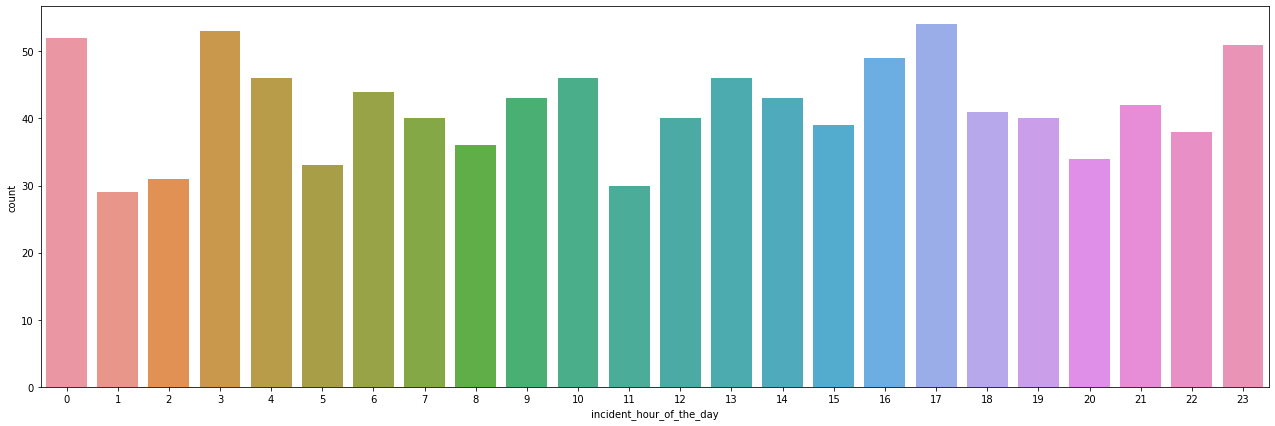

In [42]:
ax=df['incident_hour_of_the_day'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['incident_hour_of_the_day'])


In incident_hour_of_the_day more incient are hapenned at 17 th 

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

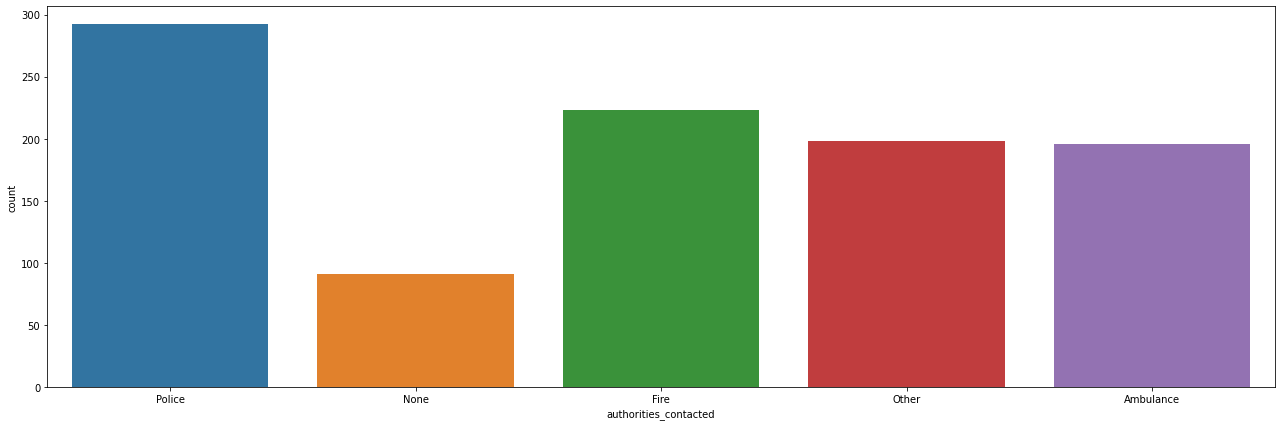

In [33]:
ax=df['authorities_contacted'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['authorities_contacted'])


NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


<AxesSubplot:xlabel='incident_state', ylabel='count'>

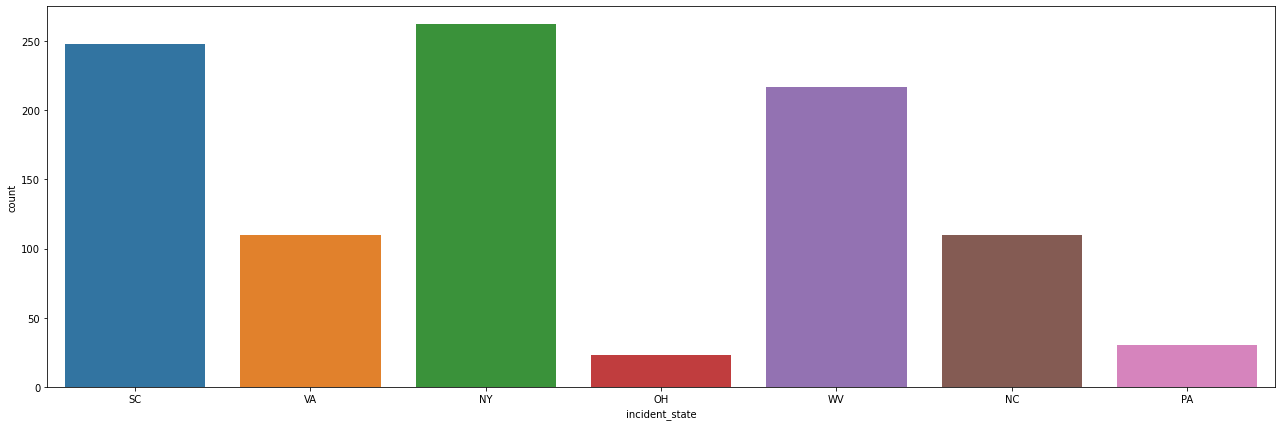

In [34]:
ax=df['incident_state'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['incident_state'])


Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


<AxesSubplot:xlabel='incident_city', ylabel='count'>

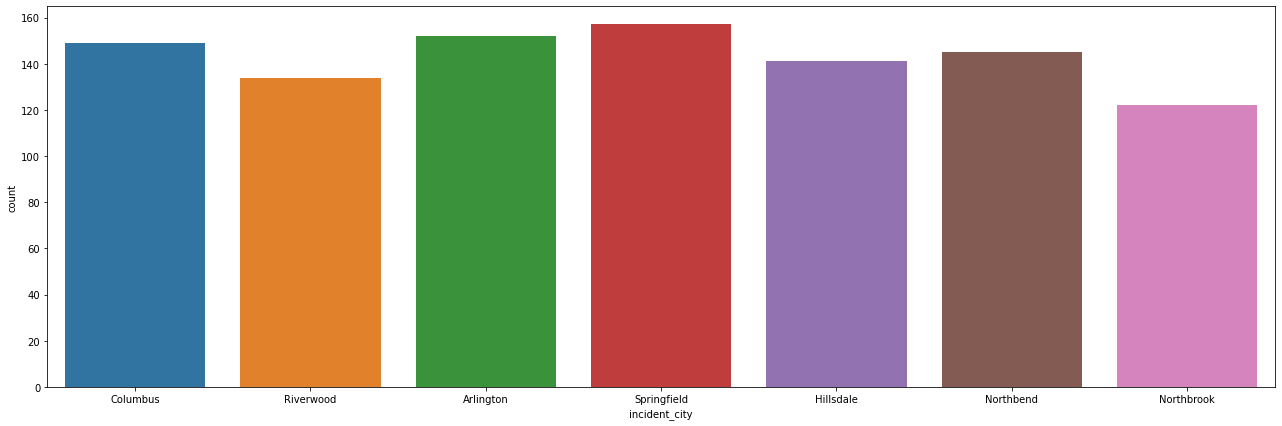

In [35]:
ax=df['incident_city'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['incident_city'])


3457 Texas Lane     1
1580 Maple Lane     1
1371 Texas Lane     1
2230 1st St         1
7098 Lincoln Hwy    1
                   ..
1454 5th Ridge      1
7238 2nd St         1
4231 3rd Ave        1
7819 2nd Ave        1
4939 Oak Lane       1
Name: incident_location, Length: 1000, dtype: int64


<AxesSubplot:xlabel='incident_location', ylabel='count'>

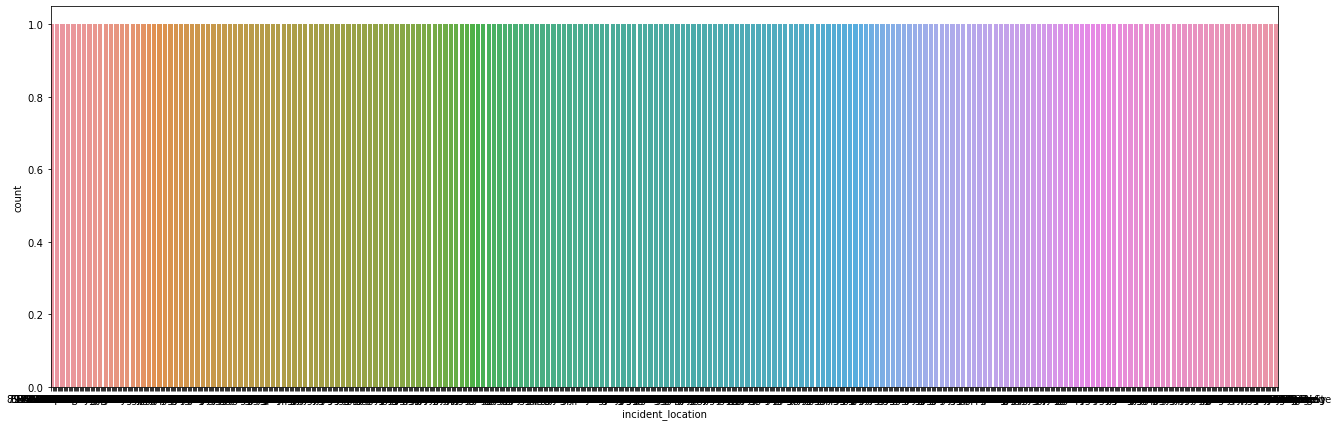

In [43]:
ax=df['incident_location'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['incident_location'])


from the above plot there are 1000 of location 

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

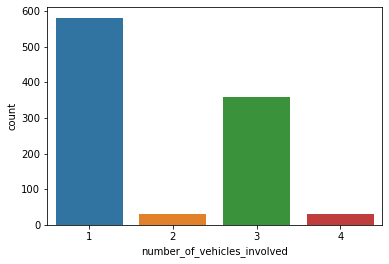

In [45]:
ax=df['number_of_vehicles_involved'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['number_of_vehicles_involved'])


There are 4 types of vehicle in that 1 number vehicle are more.

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

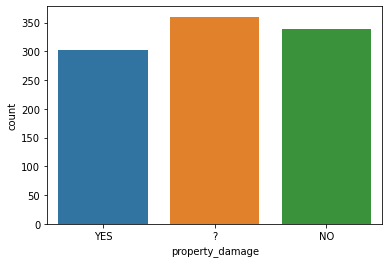

In [47]:
ax=df['property_damage'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['property_damage'])


It is of 3 types

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

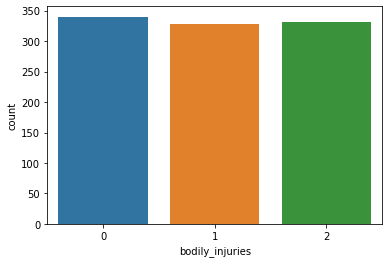

In [49]:
ax=df['bodily_injuries'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['bodily_injuries'])


It is also of 3 types

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


<AxesSubplot:xlabel='witnesses', ylabel='count'>

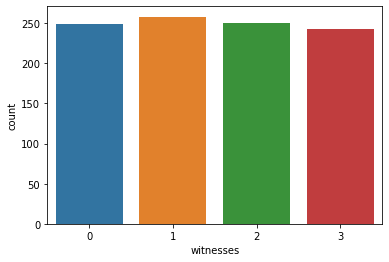

In [52]:
ax=df['witnesses'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['witnesses'])


witnesses is also of 4 types

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

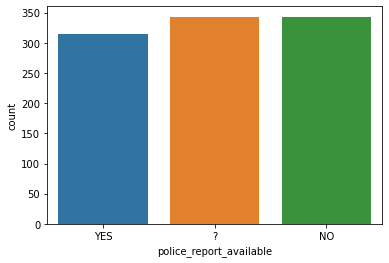

In [54]:
ax=df['police_report_available'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['police_report_available'])


59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64


<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

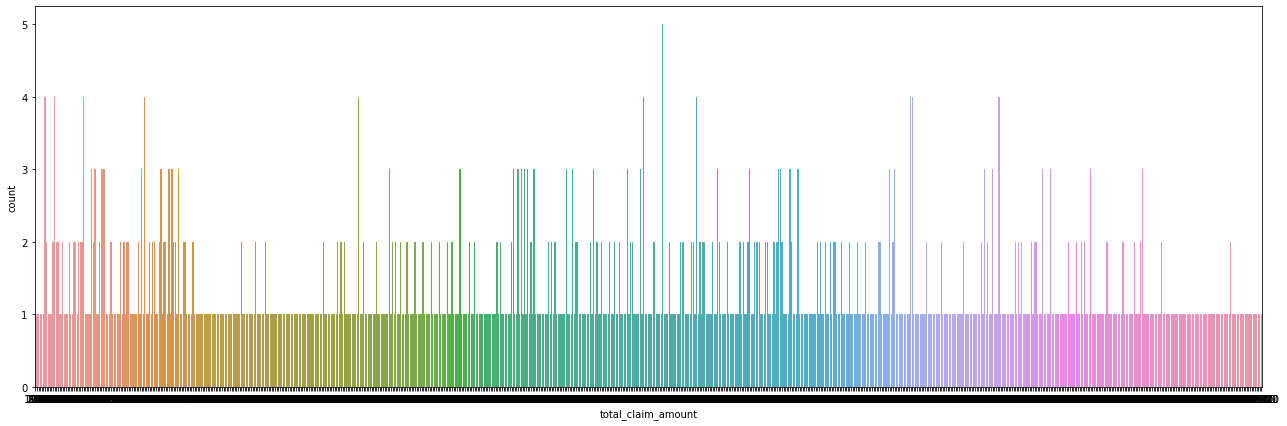

In [55]:
ax=df['total_claim_amount'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['total_claim_amount'])


0        25
480       7
640       7
580       5
6340      5
         ..
16820     1
5960      1
10840     1
8000      1
5530      1
Name: injury_claim, Length: 638, dtype: int64


<AxesSubplot:xlabel='injury_claim', ylabel='count'>

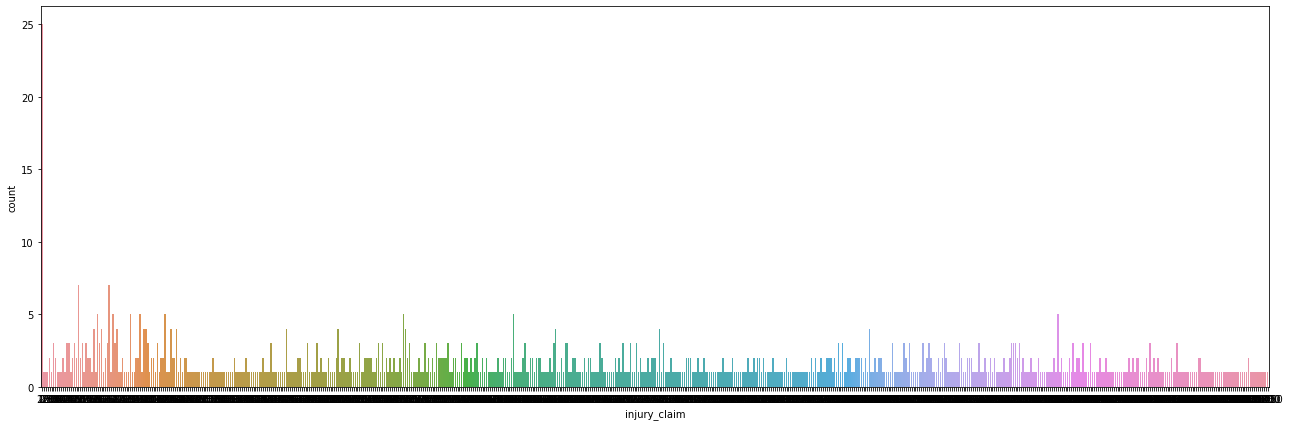

In [56]:
ax=df['injury_claim'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['injury_claim'])


0        19
860       6
660       5
480       5
10000     5
         ..
17880     1
1500      1
14080     1
7850      1
21630     1
Name: property_claim, Length: 626, dtype: int64


<AxesSubplot:xlabel='property_claim', ylabel='count'>

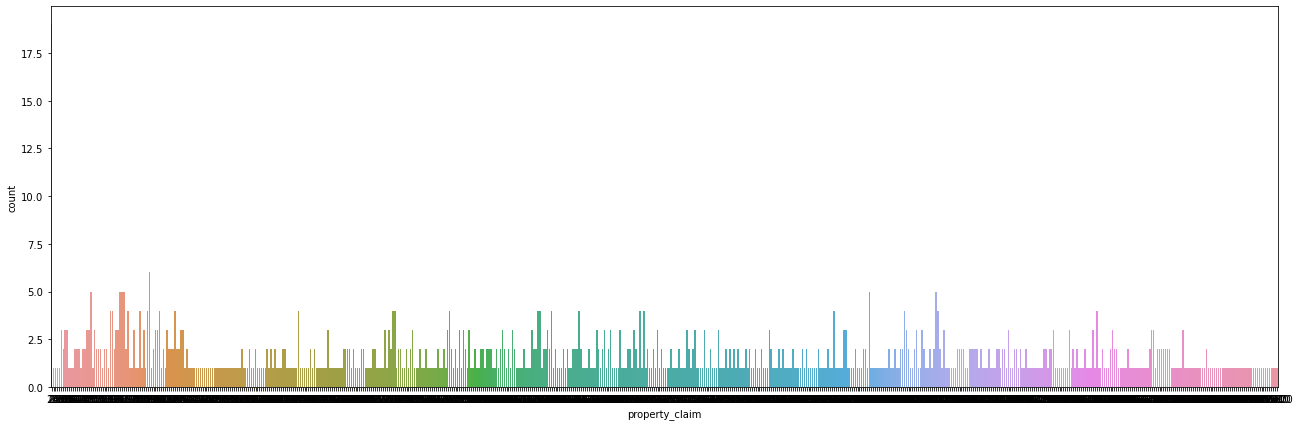

In [57]:
ax=df['property_claim'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['property_claim'])

5040     7
3360     6
3600     5
44800    5
33600    5
        ..
46680    1
3640     1
34320    1
40530    1
51200    1
Name: vehicle_claim, Length: 726, dtype: int64


<AxesSubplot:xlabel='vehicle_claim', ylabel='count'>

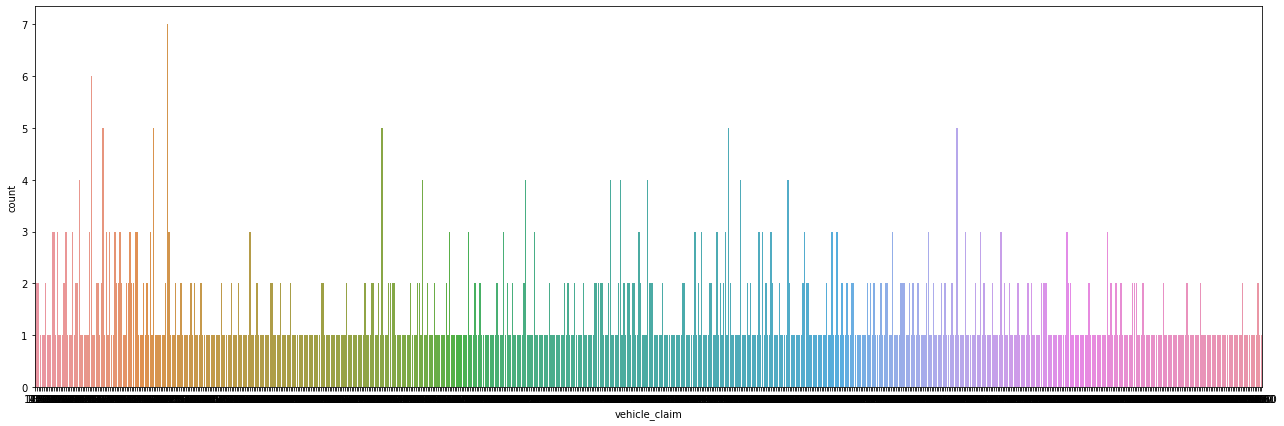

In [58]:
ax=df['vehicle_claim'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['vehicle_claim'])


Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


<AxesSubplot:xlabel='auto_make', ylabel='count'>

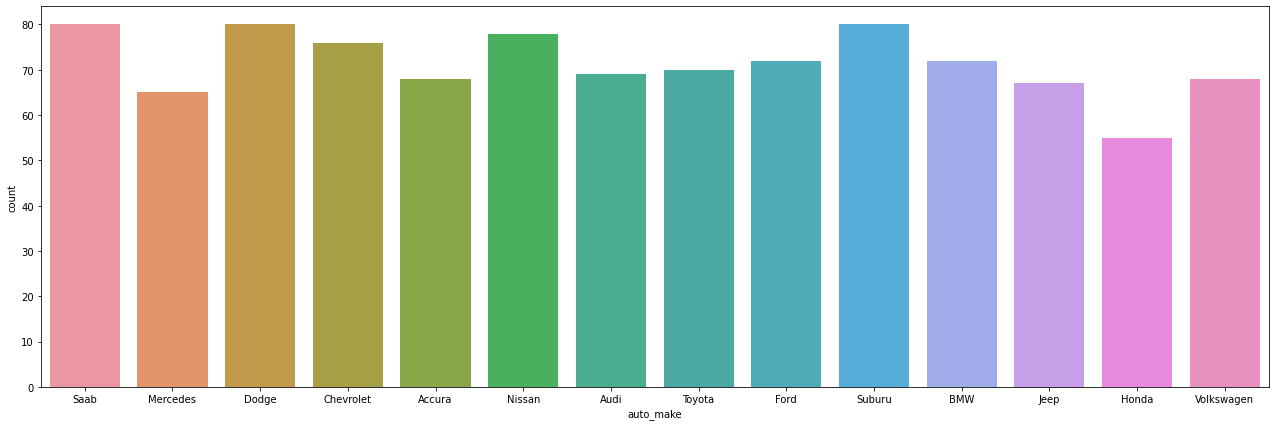

In [59]:
ax=df['auto_make'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['auto_make'])


These are the auto types

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda 

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
E400              27
F150              27
95                27
Grand Cherokee    25
93                25
Tahoe             24
Maxima            24
Escape            24
Ultima            23
X5                23
Civic             22
Silverado         22
Highlander        22
Fusion            21
TL                20
Impreza           20
ML350             20
Corolla           20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


<AxesSubplot:xlabel='auto_model', ylabel='count'>

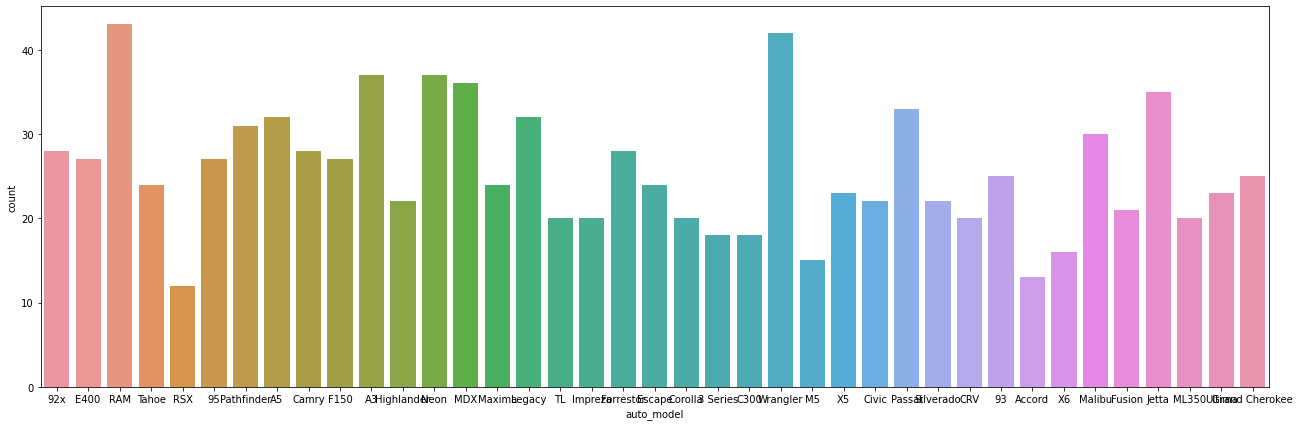

In [60]:
ax=df['auto_model'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['auto_model'])


1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


<AxesSubplot:xlabel='auto_year', ylabel='count'>

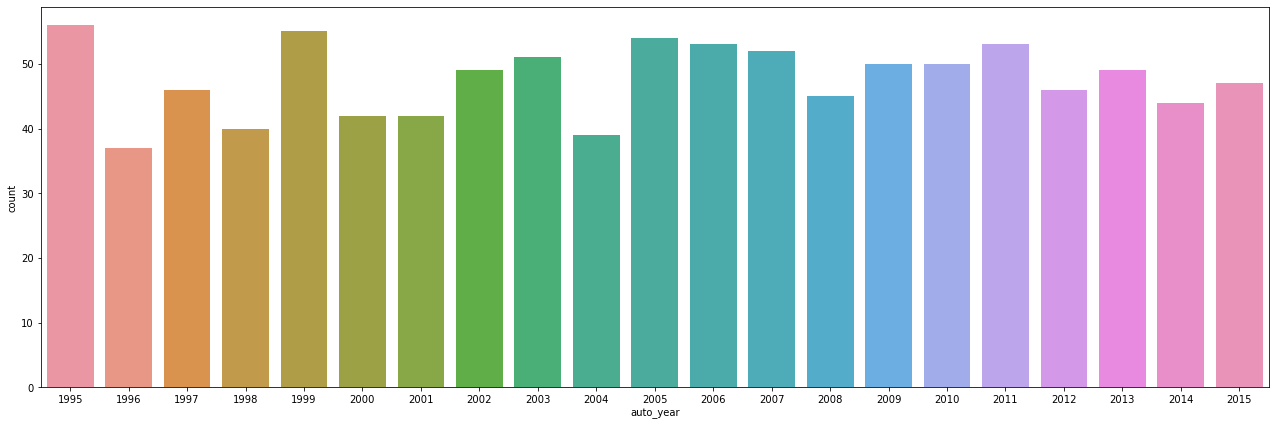

In [61]:
ax=df['auto_year'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['auto_year'])


N    753
Y    247
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

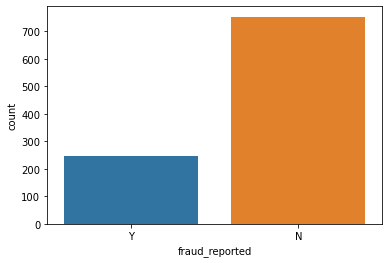

In [63]:
ax=df['fraud_reported'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['fraud_reported'])


Not more fraud detected

# Checking unique values

In [64]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [65]:
df['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [66]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [67]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [68]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [69]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [70]:
df['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

In [71]:
df['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [72]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [73]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [74]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [76]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [75]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location 

In [77]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [78]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [79]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [80]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [81]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [82]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [83]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [85]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [86]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [87]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [88]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [89]:
df['capital-gains'].unique()

array([ 53300,      0,  35100,  48900,  66000,  38400,  52800,  41300,
        55700,  63600,  53500,  45500,  57000,  46700,  72700,  31000,
        53200,  27500,  81100,  51400,  65700,  48500,  49700,  36400,
        35300,  88400,  47600,  71500,  36100,  56600,  94800,  36900,
        69100,  62400,  35700,  43400,  59600,  43300,  56200,  37800,
        78300,  52700,  57300,    800,  55200,  90700,  67700,  61500,
        37300,  50500,  34300,  28800,  52600,  34400,  62000,  41200,
        44300,  58000,  51100,  47200,  70500,  40700,  42400,  57900,
        60000,  65300,  84900,  45300,  68900,  46300,  76000,  58600,
        54100,  58100,  13100,  31900,  17600,  52000,  29000,  62500,
        39600,  47700,  38100,  71400,  75400,  88800,  53900,  27000,
        72200,  29600,  51000,  62700,  25000,  68500,  42900,  29300,
        45100,  63100,  66400,  25500,  59900,  62200,  24000,  24800,
        47800,  53000,  24400,  65600,  39900,  40600,  33300,  54000,
      

In [90]:
df['capital-loss'].unique()

array([      0,  -62400,  -46000,  -77000,  -39300,  -51000,  -32800,
        -55500,  -37800,  -27300,  -68200,  -31000,  -53500,  -29200,
        -30200,  -55600,  -64000,  -49200,  -55700,  -24100,  -67400,
        -60200,  -28700,  -40300,  -46500,  -39600,  -55000,  -45800,
        -58500,  -49500,  -49000,  -91200,  -66200,  -51500,  -50000,
        -50300,  -42900,  -19700,  -45000,  -40600,  -80600,  -44200,
        -78600,  -56100,  -20800,  -58400,  -71700,  -72300,  -31700,
        -58100,  -24300,  -56400,  -57000,  -47500,  -38800,  -41000,
        -56800,  -63100,  -36200,  -53700,  -69700,  -32100,  -47300,
        -54800,  -45200,  -65600,  -20400,  -77500,  -43200,  -56200,
        -57900,  -57100,  -38200,  -44600,  -44500,  -66900,  -82400,
        -54000,  -59100,  -59300,  -31400,  -26900,  -51100,  -59900,
        -88300,  -41300,  -45100,  -58900,  -22300,  -30300,  -51300,
        -57700,  -39200,  -67900,  -57500,  -90200,  -13800,  -34400,
        -36700,  -39

In [93]:
df=df.replace('?',np.nan)

In [96]:
df['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [97]:
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [98]:
df['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [95]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [99]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

# Encoding of the data

In [100]:
lencoder=LabelEncoder()
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')


In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_education_level      1000 non-null   int32  
 9   insured_occupation           1000 non-null   int32  
 10  insured_hobbies              1000 non-null   int32  
 11  insured_relationship         1000 non-null   int32  
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [102]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

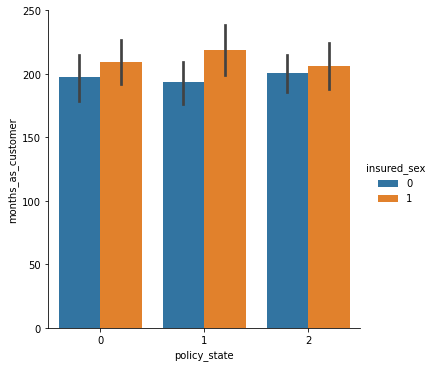

In [105]:
g=sns.catplot(y='months_as_customer',x='policy_state',hue='insured_sex',data=df,kind='bar')
plt.show()

monthly customer are more in female candidate

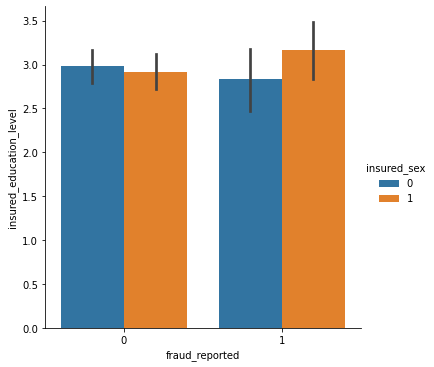

In [108]:
g=sns.catplot(x='fraud_reported',y='insured_education_level',hue='insured_sex',data=df,kind='bar')
plt.show()

from the above plot insured_education_level are more for female candidate

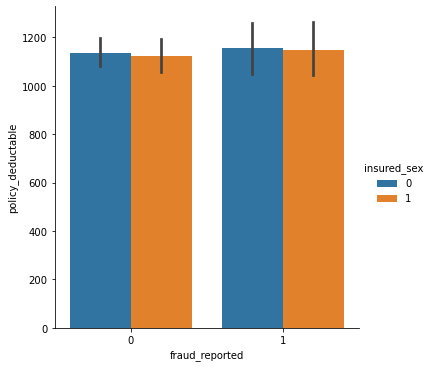

In [109]:
g=sns.catplot(x='fraud_reported',y='policy_deductable',hue='insured_sex',data=df,kind='bar')
plt.show()

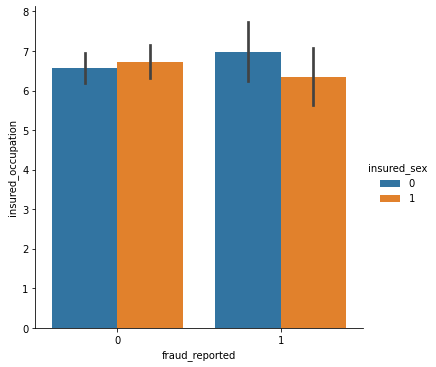

In [110]:
g=sns.catplot(x='fraud_reported',y='insured_occupation',hue='insured_sex',data=df,kind='bar')
plt.show()

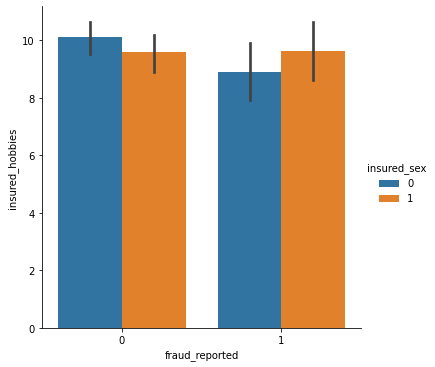

In [111]:
g=sns.catplot(x='fraud_reported',y='insured_hobbies',hue='insured_sex',data=df,kind='bar')
plt.show()

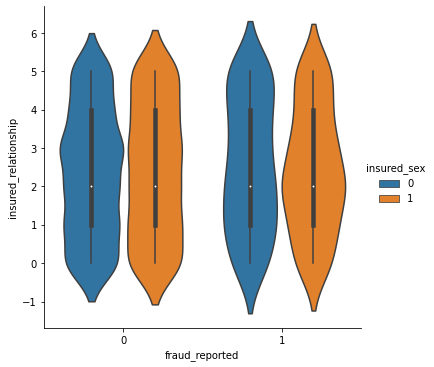

In [113]:
g=sns.catplot(x='fraud_reported',y='insured_relationship',hue='insured_sex',data=df,kind='violin')
plt.show()

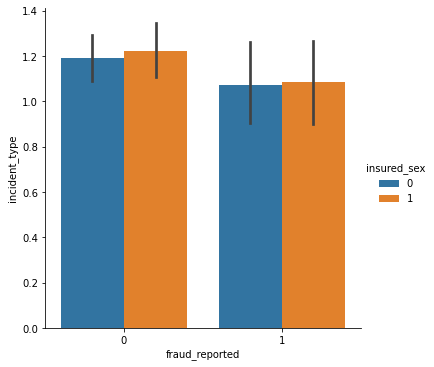

In [114]:
g=sns.catplot(x='fraud_reported',y='incident_type',hue='insured_sex',data=df,kind='bar')
plt.show()

fraud_reported are more for female candidate

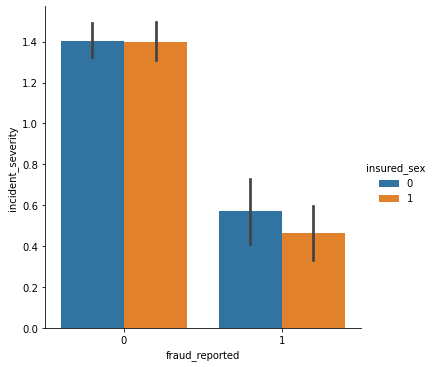

In [115]:
g=sns.catplot(x='fraud_reported',y='incident_severity',hue='insured_sex',data=df,kind='bar')
plt.show()

fraud_reported are more for male candidate

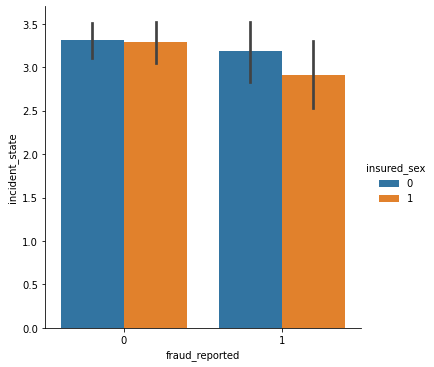

In [116]:
g=sns.catplot(x='fraud_reported',y='incident_state',hue='insured_sex',data=df,kind='bar')
plt.show()

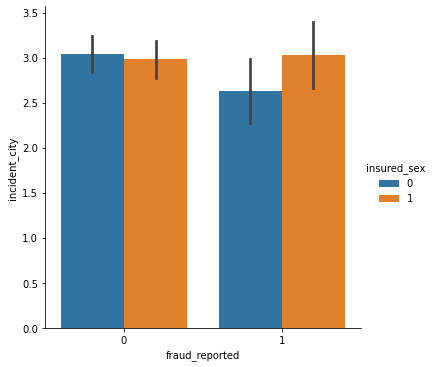

In [117]:
g=sns.catplot(x='fraud_reported',y='incident_city',hue='insured_sex',data=df,kind='bar')
plt.show()

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

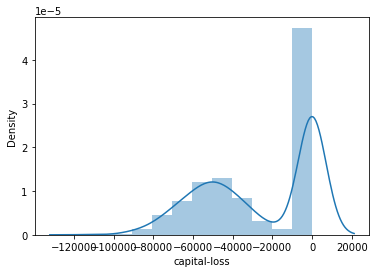

In [118]:
sns.distplot(df['capital-loss'],kde=True)

from the above plot it is observed that capital-loss os more for 0

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

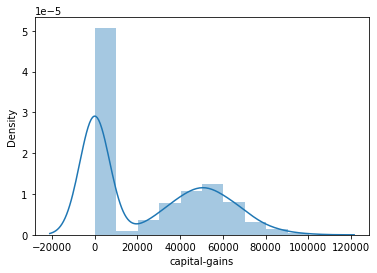

In [120]:
sns.distplot(df['capital-gains'],kde=True)

In [ ]:
from the above plot it is observed that capital-gains os more for 0

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

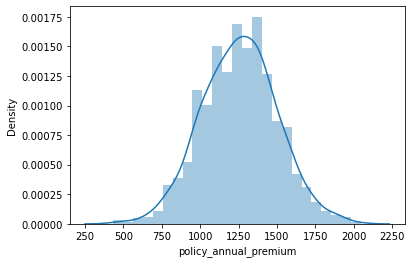

In [121]:
sns.distplot(df['policy_annual_premium'],kde=True)

policy_annual_premium it is maximum in the range of 750 to 1750

# Describe the dataset

In [122]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,501214.488000,0.463000,2.966000,6.653000,...,1.487000,1.000000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,71701.610941,0.498879,1.948497,4.019048,...,1.111335,0.828666,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,430104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,448404.500000,0.000000,1.000000,3.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,466445.500000,0.000000,3.000000,7.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,603251.000000,1.000000,5.000000,10.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,620962.000000,1.000000,6.000000,13.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<AxesSubplot:>

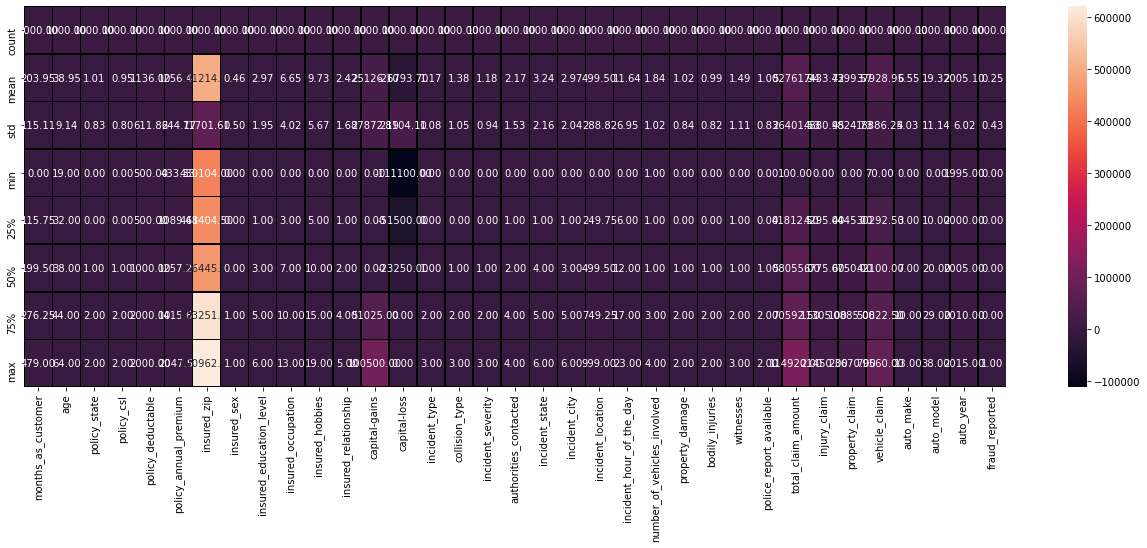

In [123]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


# Correlation of the columns with the target columns

In [124]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.017895,0.060925,-0.000833,0.009814,...,0.058383,-0.071746,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.025604,0.073337,0.000969,0.017220,...,0.052359,-0.063040,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,0.008777,-0.020481,-0.034327,-0.031215,...,0.022960,-0.024713,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.006879,-0.010757,0.009153,0.015788,...,0.071500,-0.007507,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.004545,-0.009733,0.015217,-0.046733,...,0.066639,0.004936,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,0.032354,0.038853,-0.019715,0.035922,...,0.002332,0.010332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,1.000000,-0.036942,0.016079,-0.069077,...,0.019805,0.050983,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,-0.036942,1.000000,0.009002,-0.006160,...,0.042463,-0.029056,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,0.016079,0.009002,1.000000,-0.020298,...,0.019211,0.016119,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,-0.069077,-0.006160,-0.020298,1.000000,...,-0.014794,-0.020739,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564


<AxesSubplot:>

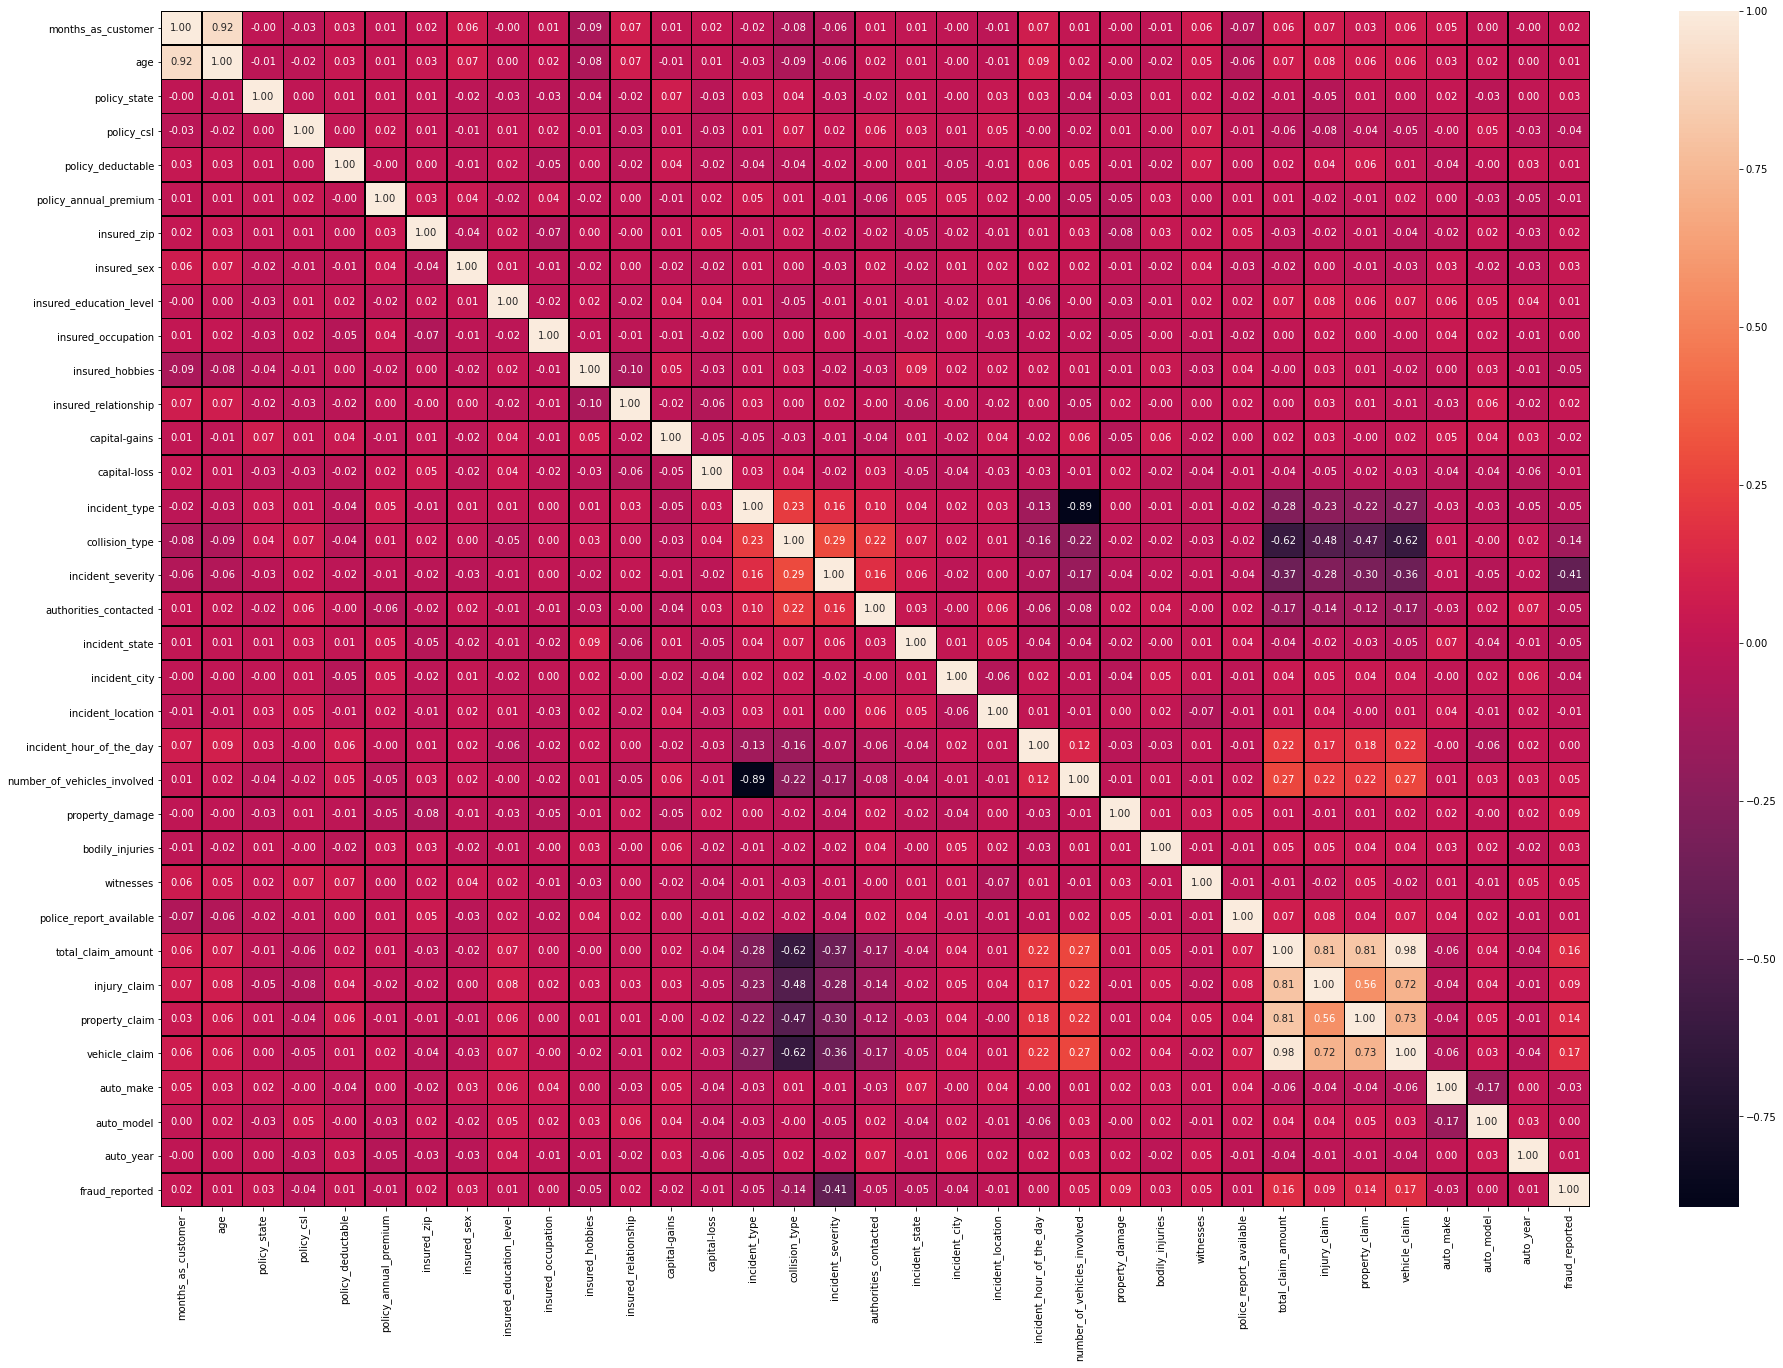

In [125]:
plt.figure(figsize=(32,22))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


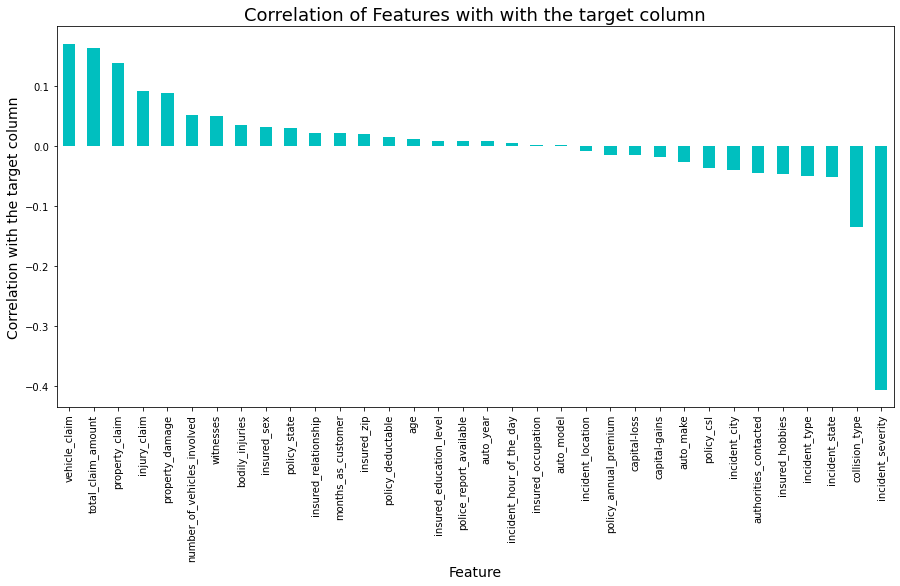

In [127]:
plt.figure(figsize=(15,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


auto_model is having very less correlation ---> 0.000720 so we drop this column

In [128]:
df.drop(["auto_model"],axis=1,inplace=True)

Multi collinearity is present hence we need to reduce it we use vif 

In [129]:
dfx=df.copy()
dfx.drop("fraud_reported",axis=1,inplace=True)

In [130]:
dfx

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year
0,328,48,2,1,1000,1406.91,466132,1,4,2,...,1,1,2,1,71610,6510,13020,52080,10,2004
1,228,42,1,1,2000,1197.22,468176,1,4,6,...,2,0,0,2,5070,780,780,3510,8,2007
2,134,29,2,0,2000,1413.14,430632,0,6,11,...,0,2,3,0,34650,7700,3850,23100,4,2007
3,256,41,0,1,2000,1415.74,608117,0,6,1,...,2,1,2,0,63400,6340,6340,50720,3,2014
4,228,44,0,2,1000,1583.91,610706,1,0,11,...,0,0,1,0,6500,1300,650,4550,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,431289,0,5,2,...,1,0,1,2,87200,17440,8720,61040,6,2006
996,285,41,0,0,1000,1436.79,608177,0,6,9,...,1,2,3,2,108480,18080,18080,72320,13,2015
997,130,34,2,1,500,1383.49,442797,0,5,1,...,2,2,3,1,67500,7500,7500,52500,11,1996
998,458,62,0,2,2000,1356.92,441714,1,0,5,...,2,0,1,1,46980,5220,5220,36540,1,1998


In [131]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [133]:
calc_vif(dfx)

,variables,VIF_Factor
0,months_as_customer,28.323707
1,age,131.061858
2,policy_state,2.561747
3,policy_csl,2.458485
4,policy_deductable,4.591421
5,policy_annual_premium,28.269574
6,insured_zip,51.567800
7,insured_sex,1.908687
8,insured_education_level,3.418077
9,insured_occupation,3.822547


from the above observation it is observed that in some column we have infinite value hence we try to apply PCA

# Skewness

In [134]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


No need to remove skewness as skewness is in the range +/- 0.5 

# Outliers Check:

In [135]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:>

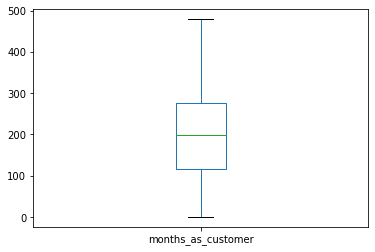

In [143]:
df['months_as_customer'].plot.box()

<AxesSubplot:>

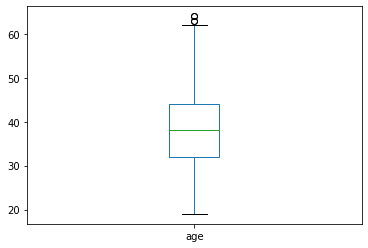

In [144]:
df['age'].plot.box()

<AxesSubplot:>

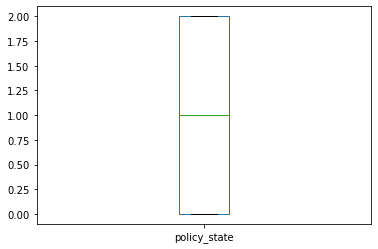

In [145]:
df['policy_state'].plot.box()

<AxesSubplot:>

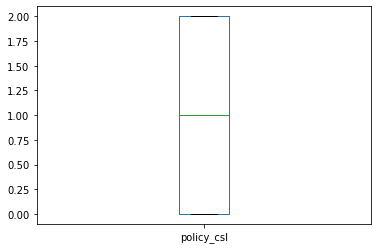

In [146]:
df['policy_csl'].plot.box()

<AxesSubplot:>

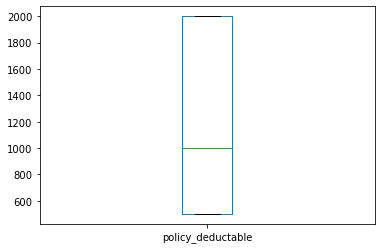

In [147]:
df['policy_deductable'].plot.box()

<AxesSubplot:>

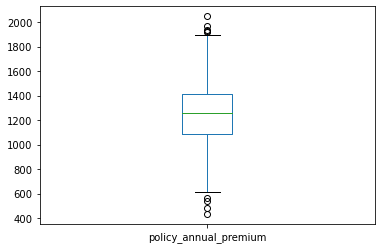

In [148]:
df['policy_annual_premium'].plot.box()

<AxesSubplot:>

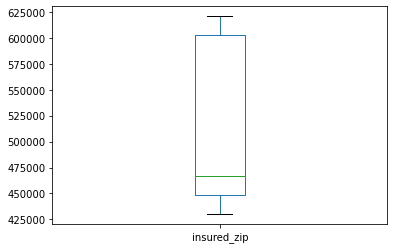

In [149]:
df['insured_zip'].plot.box()

<AxesSubplot:>

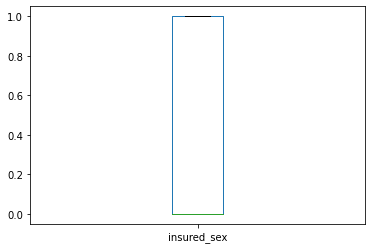

In [150]:
df['insured_sex'].plot.box()

<AxesSubplot:>

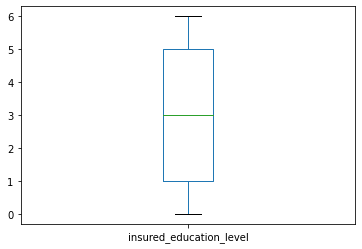

In [151]:
df['insured_education_level'].plot.box()

<AxesSubplot:>

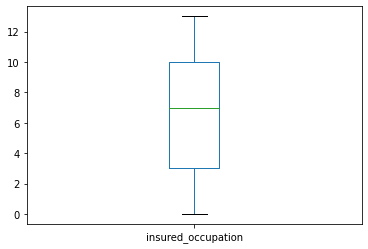

In [152]:
df['insured_occupation'].plot.box()

<AxesSubplot:>

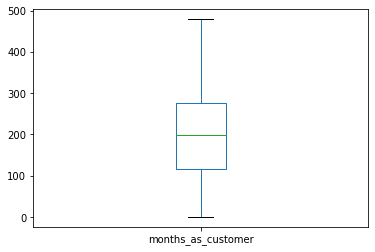

In [153]:
df['capital-gains'].plot.box()

<AxesSubplot:>

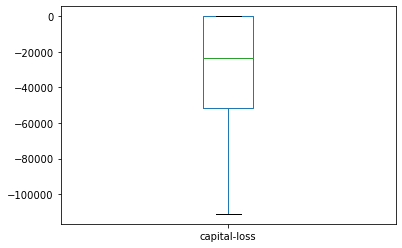

In [158]:
df['capital-loss'].plot.box()

<AxesSubplot:>

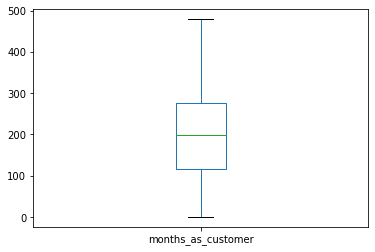

In [155]:
df['months_as_customer'].plot.box()

<AxesSubplot:>

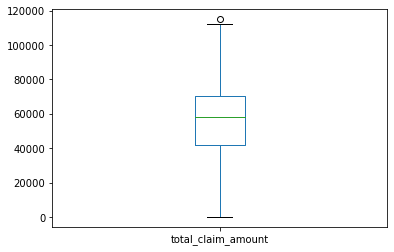

In [159]:
df['total_claim_amount'].plot.box()

<Figure size 1440x720 with 0 Axes>

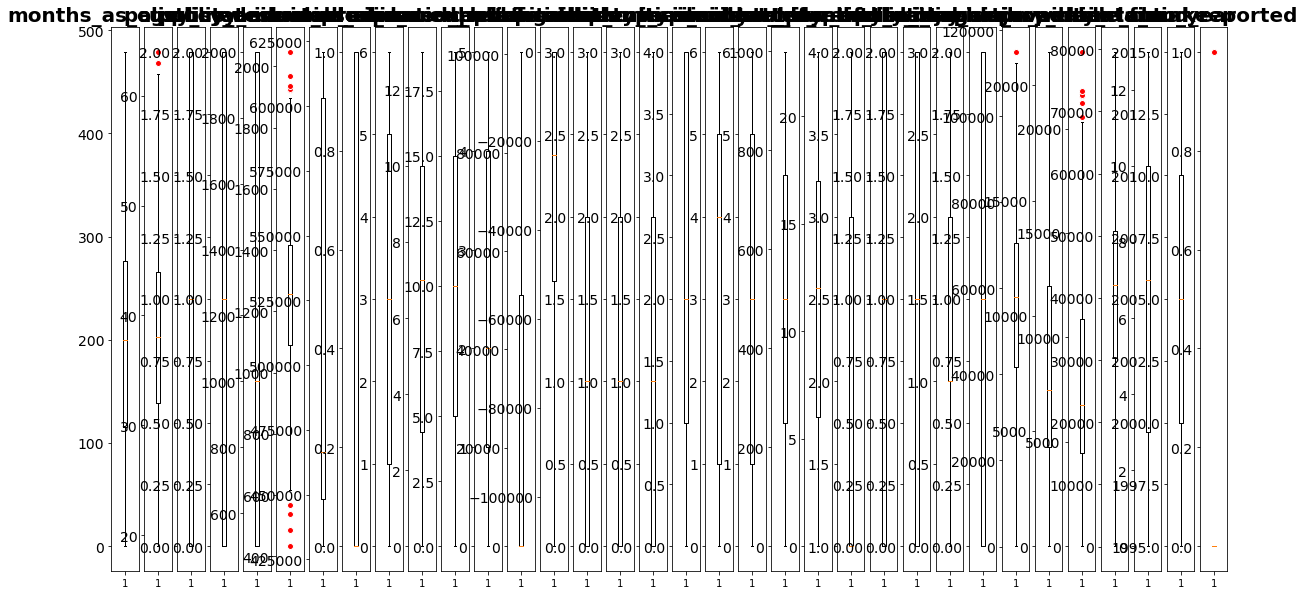

In [163]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))
#axs = plt.subplots(1, len(df.columns))
for i, ax in enumerate(axs.flat):
    #plt.subplot(18,2,i+1)
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

Some outliers are present hence we need to reduce it.

# Outliers Removal

In [164]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([229, 248, 500, 763, 807], dtype=int64),
 array([ 5,  5, 29,  5, 13], dtype=int64))

In [165]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,466132,1,4,2,...,1,2,1,71610,6510,13020,52080,10,2004,1
1,228,42,1,1,2000,1197.22,468176,1,4,6,...,0,0,2,5070,780,780,3510,8,2007,1
2,134,29,2,0,2000,1413.14,430632,0,6,11,...,2,3,0,34650,7700,3850,23100,4,2007,0
3,256,41,0,1,2000,1415.74,608117,0,6,1,...,1,2,0,63400,6340,6340,50720,3,2014,1
4,228,44,0,2,1000,1583.91,610706,1,0,11,...,0,1,0,6500,1300,650,4550,0,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,431289,0,5,2,...,0,1,2,87200,17440,8720,61040,6,2006,0
996,285,41,0,0,1000,1436.79,608177,0,6,9,...,2,3,2,108480,18080,18080,72320,13,2015,0
997,130,34,2,1,500,1383.49,442797,0,5,1,...,2,3,1,67500,7500,7500,52500,11,1996,0
998,458,62,0,2,2000,1356.92,441714,1,0,5,...,0,1,1,46980,5220,5220,36540,1,1998,0


In [166]:
df.shape

(1000, 34)

# Percentage loss of data

In [167]:
percentage_loss=((1000-995)/1000)*100
print(percentage_loss)

0.5


# Sparating the target and feature column

In [171]:
feature=df_new.drop("fraud_reported",axis=1)
target=df_new["fraud_reported"]

In [182]:
y=target
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 995, dtype: int32

In [186]:
y.value_counts()

0    749
1    246
Name: fraud_reported, dtype: int64

# Scaling the data using the min max scaler

In [172]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.68475992, 0.64444444, 1.        , ..., 0.65429614, 0.76923077,
        0.45      ],
       [0.47599165, 0.51111111, 0.5       , ..., 0.04327588, 0.61538462,
        0.6       ],
       [0.27974948, 0.22222222, 1.        , ..., 0.28972198, 0.30769231,
        0.6       ],
       ...,
       [0.27139875, 0.33333333, 1.        , ..., 0.65957982, 0.84615385,
        0.05      ],
       [0.95615866, 0.95555556, 0.        , ..., 0.45879985, 0.07692308,
        0.15      ],
       [0.9519833 , 0.91111111, 1.        , ..., 0.04541452, 0.61538462,
        0.6       ]])

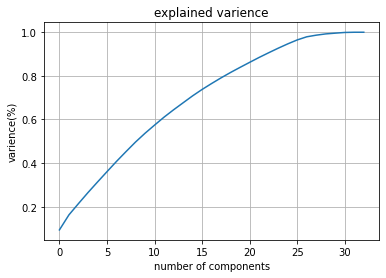

In [176]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("varience(%)")
plt.title("explained varience")
plt.grid()
plt.show()


We can see that almost 100% of varience is explained by 30 components. So instead of giving 34 componets to our algorithm we will use these 30 componenets.

In [179]:
pca=PCA(n_components=30)
new_data=pca.fit_transform(x)
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12',
                                          'PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24',
                                          'PC-25','PC-26','PC-27','PC-28','PC-29','PC-30'])

In [180]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30
0,0.210084,0.532645,0.068460,-0.283269,-0.318245,-0.379582,0.290983,-0.132913,0.089518,-0.311086,...,-0.182515,0.681334,0.111684,0.210108,-0.000110,-0.005092,-0.303817,0.127765,0.200570,-0.049370
1,1.088393,0.474920,-0.628152,0.244070,-0.605411,0.325151,0.224178,-0.219517,-0.255509,-0.422431,...,-0.278751,0.261547,-0.137504,0.015615,-0.202316,-0.068854,0.160606,-0.053446,0.017766,0.175030
2,-0.166738,-0.379363,0.869847,0.287796,-0.116966,-0.400049,-0.236495,0.094145,-0.805282,-0.084191,...,0.129483,0.118092,-0.309784,0.233246,-0.017953,0.192365,0.324145,0.130491,-0.176207,0.011060
3,-0.058800,-0.410093,-0.247497,-0.001633,-0.503502,0.064493,-0.468183,0.848706,-0.441656,0.616141,...,0.305573,0.172765,0.207961,-0.167610,-0.029311,0.259882,0.248685,0.190147,-0.012213,-0.020979
4,0.980159,0.600954,0.520332,0.156650,0.175290,0.705521,-0.272508,0.378089,0.308745,0.803014,...,-0.308905,-0.170632,0.021634,-0.264482,0.314330,0.576421,-0.056826,0.194371,-0.045016,0.201065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-0.382723,-0.504134,-0.173962,-0.668956,-0.545901,0.239007,0.200412,-0.130501,0.763813,0.073461,...,-0.108103,-0.053225,-0.349094,-0.063806,0.019104,-0.306553,0.070824,0.020218,-0.296111,0.002483
991,-0.720856,-0.513513,-0.517875,-0.719077,0.190240,0.147410,0.600804,0.665629,-0.297096,0.291533,...,-0.672164,0.092321,-0.478311,-0.303394,0.522658,0.101611,-0.433023,0.092129,0.008672,-0.000249
992,-0.192670,-0.427245,-0.201598,0.265858,0.005772,-0.952326,-0.161841,-0.464476,-0.017294,0.378737,...,0.448977,0.341697,-0.027918,0.129529,-0.068137,0.218723,-0.265052,0.150050,-0.040716,0.032862
993,0.225978,0.631694,-0.602382,0.114527,-0.704841,0.399015,-0.570694,0.460374,0.111531,0.422176,...,0.034227,0.494674,0.312264,0.136322,-0.182566,-0.026919,0.095399,0.075490,-0.009828,-0.027257


## Applying SMOTE

In [185]:
from imblearn.over_sampling import SMOTE

In [187]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(principal_x,y)

In [188]:
trainy.value_counts()

1    749
0    749
Name: fraud_reported, dtype: int64

# Logistic Regression

In [189]:
lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 132 The model performs very well
At random state:- 132
Training accuracy_score is:- 73.70617696160268
Testing accuracy_score is:- 73.66666666666667
At random state 204 The model performs very well
At random state:- 204
Training accuracy_score is:- 73.95659432387312
Testing accuracy_score is:- 74.0
At random state 392 The model performs very well
At random state:- 392
Training accuracy_score is:- 72.70450751252086
Testing accuracy_score is:- 72.66666666666667
At random state 474 The model performs very well
At random state:- 474
Training accuracy_score is:- 72.70450751252086
Testing accuracy_score is:- 72.66666666666667
At random state 540 The model performs very well
At random state:- 540
Training accuracy_score is:- 73.28881469115191
Testing accuracy_score is:- 73.33333333333333
At random state 566 The model performs very well
At random state:- 566
Training accuracy_score is:- 73.03839732888147
Testing accuracy_score is:- 73.0
At random state 634 The model performs ver

In [190]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=132,test_size=0.20)

In [191]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[71 77]
 [82 70]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       148
           1       0.48      0.46      0.47       152

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300



# Cross validation for logistic regression

In [192]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,trainx,trainy,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 71.49532710280374
accuracy_score is :- 74.0


At cv:- 3
Cross validation score is:- 71.7625918503674
accuracy_score is :- 74.0


At cv:- 4
Cross validation score is:- 71.82852049910873
accuracy_score is :- 74.0


At cv:- 5
Cross validation score is:- 71.69498327759199
accuracy_score is :- 74.0


At cv:- 6
Cross validation score is:- 72.49745649263723
accuracy_score is :- 74.0


At cv:- 7
Cross validation score is:- 72.16288384512683
accuracy_score is :- 74.0


At cv:- 8
Cross validation score is:- 72.23233587438844
accuracy_score is :- 74.0


At cv:- 9
Cross validation score is:- 72.22983751372757
accuracy_score is :- 74.0




In [193]:
print("At cv:-",6)
print("Cross validation score is:-",72.497 )
print("Accuracy_score is :-",74.0)

At cv:- 6
Cross validation score is:- 72.497
Accuracy_score is :- 74.0


# AUC-ROC curve

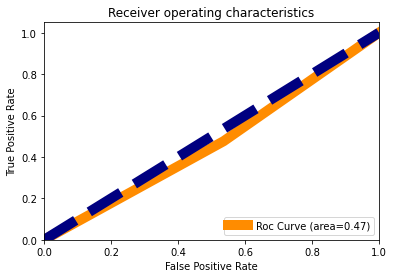

In [194]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [195]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

0.739775960170697

# Classification model buliding

In [ ]:
svc=SVC(kernel='rbf')
for i in range(1,2000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [200]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [201]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [202]:
svmkernel('rbf')

0.86
[[124  21]
 [ 21 134]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       145
           1       0.86      0.86      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# Cross-validation for SVM for rbf kernel

In [203]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,trainx,trainy,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 81.64218958611482
accuracy_score is :- 94.66666666666667


At cv:- 3
Cross validation score is:- 85.05116900467601
accuracy_score is :- 94.66666666666667


At cv:- 4
Cross validation score is:- 86.05222816399287
accuracy_score is :- 94.66666666666667


At cv:- 5
Cross validation score is:- 87.65596432552954
accuracy_score is :- 94.66666666666667


At cv:- 6
Cross validation score is:- 87.52342704149932
accuracy_score is :- 94.66666666666667


At cv:- 7
Cross validation score is:- 87.18291054739653
accuracy_score is :- 94.66666666666667


At cv:- 8
Cross validation score is:- 87.39511036522927
accuracy_score is :- 94.66666666666667


At cv:- 9
Cross validation score is:- 88.13016537206711
accuracy_score is :- 94.66666666666667




In [204]:
print("At cv:-",9)
print("Cross validation score is:-",88.130)
print("Accuracy_score is :-",94.666)

At cv:- 9
Cross validation score is:- 88.13
Accuracy_score is :- 94.666


In [205]:
svmkernel('linear')

0.7733333333333333
[[108  37]
 [ 31 124]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       145
           1       0.77      0.80      0.78       155

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [206]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.48163606010016696
0.5133333333333333
[[73 72]
 [74 81]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       145
           1       0.53      0.52      0.53       155

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300



# Cross-validation for SVM for linear kernel

In [207]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,trainx,trainy,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 81.64218958611482
accuracy_score is :- 94.66666666666667


At cv:- 3
Cross validation score is:- 85.05116900467601
accuracy_score is :- 94.66666666666667


At cv:- 4
Cross validation score is:- 86.05222816399287
accuracy_score is :- 94.66666666666667


At cv:- 5
Cross validation score is:- 87.65596432552954
accuracy_score is :- 94.66666666666667


At cv:- 6
Cross validation score is:- 87.52342704149932
accuracy_score is :- 94.66666666666667


At cv:- 7
Cross validation score is:- 87.18291054739653
accuracy_score is :- 94.66666666666667


At cv:- 8
Cross validation score is:- 87.39511036522927
accuracy_score is :- 94.66666666666667


At cv:- 9
Cross validation score is:- 88.13016537206711
accuracy_score is :- 94.66666666666667




In [208]:
print("At cv:-",9)
print("Cross validation score is:-",88.13)
print("Accuracy_score is :-", 94.666)

At cv:- 4
Cross validation score is:- 81.845
Accuracy_score is :- 82.217


In [209]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [210]:
svcr = SVC(C=10, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,trainx,trainy,cv=4)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 89.0
Cross Val Score: 89.58894830659537


# Auc roc curve for SVM with 'rbf' kernel

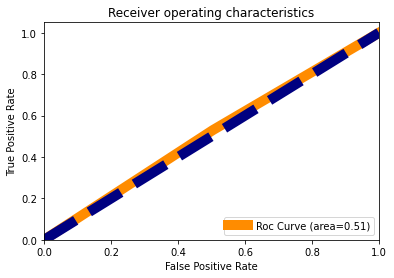

In [211]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [212]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [213]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [214]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7633333333333333
1.0
[[107  38]
 [ 33 122]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       145
           1       0.76      0.79      0.77       155

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [216]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,trainx,trainy,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 73.9652870493992
accuracy_score is :- 76.33333333333333


At cv:- 3
Cross validation score is:- 74.83433533734136
accuracy_score is :- 76.33333333333333


At cv:- 4
Cross validation score is:- 74.10213903743315
accuracy_score is :- 76.33333333333333


At cv:- 5
Cross validation score is:- 75.77235228539575
accuracy_score is :- 76.33333333333333


At cv:- 6
Cross validation score is:- 76.90655957161981
accuracy_score is :- 76.33333333333333


At cv:- 7
Cross validation score is:- 77.77036048064086
accuracy_score is :- 76.33333333333333


At cv:- 8
Cross validation score is:- 76.97512515644556
accuracy_score is :- 76.33333333333333


At cv:- 9
Cross validation score is:- 77.10683051567548
accuracy_score is :- 76.33333333333333




In [217]:
print("At cv:-",6)
print("Cross validation score is:-",76.906)
print("Accuracy_score is :-", 76.333)


At cv:- 6
Cross validation score is:- 76.906
Accuracy_score is :- 76.333


In [218]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=9)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 9}
Accuracy score:  0.7170429208472686


In [219]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [220]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=53,test_size=0.20)

In [221]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.6833333333333333
[[ 57  88]
 [  7 148]]
              precision    recall  f1-score   support

           0       0.89      0.39      0.55       145
           1       0.63      0.95      0.76       155

    accuracy                           0.68       300
   macro avg       0.76      0.67      0.65       300
weighted avg       0.75      0.68      0.65       300



In [222]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,6):
    knnscore = cross_val_score(knn,trainx,trainy,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 68.09078771695593
accuracy_score is :- 68.33333333333333


At cv:- 3
Cross validation score is:- 67.35845023380094
accuracy_score is :- 68.33333333333333


At cv:- 4
Cross validation score is:- 68.42691622103388
accuracy_score is :- 68.33333333333333


At cv:- 5
Cross validation score is:- 67.96031215161649
accuracy_score is :- 68.33333333333333




In [223]:
print("At cv:-",3)
print("Cross validation score is:-",67.358)
print("Accuracy_score is :-", 68.333)

At cv:- 3
Cross validation score is:- 67.358
Accuracy_score is :- 68.333


# Auc Roc Curve

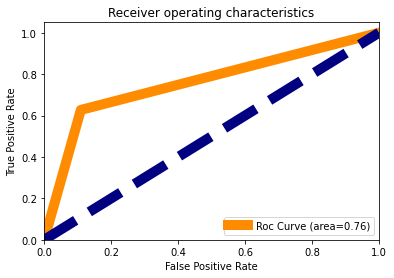

In [224]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [225]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.5175292153589316
testing Accuracy= 0.6833333333333333
[[ 57  88]
 [  7 148]]
              precision    recall  f1-score   support

           0       0.89      0.39      0.55       145
           1       0.63      0.95      0.76       155

    accuracy                           0.68       300
   macro avg       0.76      0.67      0.65       300
weighted avg       0.75      0.68      0.65       300



In [227]:
rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

rfcs= accuracy_score(y_test,pred_rf)
for j in range(2,10):
    rfscore = cross_val_score(rf,trainx,trainy,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 84.17890520694259
accuracy_score is :- 87.66666666666667


At cv:- 3
Cross validation score is:- 86.450501002004
accuracy_score is :- 87.66666666666667


At cv:- 4
Cross validation score is:- 87.51960784313727
accuracy_score is :- 87.66666666666667


At cv:- 5
Cross validation score is:- 86.52196209587514
accuracy_score is :- 87.66666666666667


At cv:- 6
Cross validation score is:- 88.12449799196787
accuracy_score is :- 87.66666666666667


At cv:- 7
Cross validation score is:- 86.98264352469961
accuracy_score is :- 87.66666666666667


At cv:- 8
Cross validation score is:- 88.25804983502104
accuracy_score is :- 87.66666666666667


At cv:- 9
Cross validation score is:- 87.45601167143626
accuracy_score is :- 87.66666666666667




In [228]:
print("At cv:-",5)
print("Cross validation score is:-",86.521)
print("Accuracy_score is :-", 87.666)

At cv:- 5
Cross validation score is:- 86.521
Accuracy_score is :- 87.666


In [229]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.5175292153589316
testing Accuracy= 0.6833333333333333
[[ 57  88]
 [  7 148]]
              precision    recall  f1-score   support

           0       0.89      0.39      0.55       145
           1       0.63      0.95      0.76       155

    accuracy                           0.68       300
   macro avg       0.76      0.67      0.65       300
weighted avg       0.75      0.68      0.65       300



In [230]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)

adcs= accuracy_score(y_test,pred_ad)
for j in range(2,10):
    adscore = cross_val_score(ad,trainx,trainy,cv=j)
    adc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",adcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 3
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 4
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 5
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 6
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 7
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 8
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666


At cv:- 9
Cross validation score is:- 87.45601167143626
accuracy_score is :- 77.66666666666666




In [231]:
print("At cv:-",5)
print("Cross validation score is:-",87.456)
print("Accuracy_score is :-", 77.666)

At cv:- 5
Cross validation score is:- 87.456
Accuracy_score is :- 77.666


# Auc Roc Curve for Ada Boost Classifier

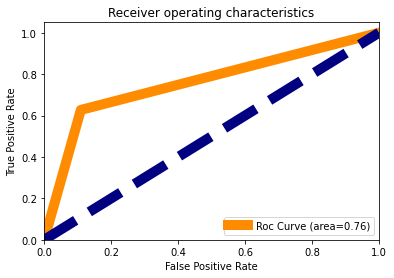

In [232]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [234]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')

rf_f1=f1_score(y_true, pred_rf, average='macro')
ad_f1=f1_score(y_true, pred_ad, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)

print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.6512438967681935
knn f1 score 0.6512438967681935
svcr f1 score 0.889458345894885
rf f1 score 0.8765006286229264
ad f1 score 0.775767244168275


In [235]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')

rf_f1=f1_score(y_true, pred_rf, average='weighted')
ad_f1=f1_score(y_true, pred_ad, average='weighted')


print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)

print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.6547702084786484
knn f1 score 0.6547702084786484
svcr f1 score 0.8897162764211302
rf f1 score 0.8766515722990539
ad f1 score 0.7762406244305864


# The best model is SVM with 'rbf' kernel. 
Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.
Accuracy Score: 89.0
Cross Val Score: 89.58894830659537

# Model Saving

In [236]:
import pickle
filename = 'inhouse_insurance_fraud.pkl'
pickle.dump(svcr, open(filename, 'wb'))

# Conclusion

In [237]:
import numpy as np
a=np.array(y_test)
a

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [238]:
predicted=np.array(svcr.predict(x_test))
predicted

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [239]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
295,0,0
296,1,1
297,0,1
298,1,1


# From the above table the model is predicted the values with 89 percent accuracy